#**DEEP LEARNING FOR COMPUTER VISION**

Select a publicly available image dataset (Recommended 1000-2000 images in total)!

Make groups of 5 people.

Topics to choose:
1. Crowd Counting
2. Object Detection
3. Image Segmentation
4. Image Classification + Attention Map Visualization

- Train a model using Keras/PyTorch
- Evaluate the model
- Present the results in the last meeting

Presentation Outline:
- Problem description
- Method/Model + justification
- Evaluation Method
- Results
- Conclusion

Make a poster that can pack all of the points above! Feel free to use your poster/PPT to present in the final session.

Poster: https://www.canva.com/design/DAGAr1HS2z8/itZDo84iR98CXQvnVdhQHw/edit?utm_content=DAGAr1HS2z8&utm_campaign=designshare&utm_medium=link2&utm_source=sharebutton.

Bonus points for groups who can train and test at least 3 models and compare them.

Choose a topic max on week 3.

In [ ]:
%cd /content/drive/MyDrive/Semester/Sem 4/Deep Learning/ASG/Project

/content/drive/MyDrive/Semester/Sem 4/Deep Learning/ASG/Project


In [2]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
import keras
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras import Input
from keras import layers
from keras import models
from keras import optimizers
from keras.models import Model, Sequential

In [3]:
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [ ]:
#read the csv file

In [4]:
data = pd.read_csv("Dataset/Training_set.csv")
data.head()

FileNotFoundError: [Errno 2] No such file or directory: 'Dataset/Training_set.csv'

In [ ]:
#add path

data['path'] = "Dataset/train/" + data["filename"]

data.head()

,filename,label,path
0,Image_1.jpg,SOUTHERN DOGFACE,Dataset/train/Image_1.jpg
1,Image_2.jpg,ADONIS,Dataset/train/Image_2.jpg
2,Image_3.jpg,BROWN SIPROETA,Dataset/train/Image_3.jpg
3,Image_4.jpg,MONARCH,Dataset/train/Image_4.jpg
4,Image_5.jpg,GREEN CELLED CATTLEHEART,Dataset/train/Image_5.jpg


EXPLORATORY DATA ANALYSIS (EDA)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6499 entries, 0 to 6498
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filename  6499 non-null   object
 1   label     6499 non-null   object
 2   path      6499 non-null   object
dtypes: object(3)
memory usage: 152.4+ KB


Butterfly Class

In [ ]:
bt_classes = data["label"].unique()
bt_class_num = data["label"].nunique()

print("Classes: ")
print(bt_classes)

print("Number of Classes: ")
print(bt_class_num)

#bt_classes --> mengambil unique value dari "label"
#bt_class_num --> menghitung unique class dari "label"
#print bt_classes --> print hasil dari unique value yang sudah diambil dari "label"
#print bt_class_num --> print hasil unique class yang sudah dihitung dari "label"

#brandon

Classes: 
['SOUTHERN DOGFACE' 'ADONIS' 'BROWN SIPROETA' 'MONARCH'
 'GREEN CELLED CATTLEHEART' 'CAIRNS BIRDWING' 'EASTERN DAPPLE WHITE'
 'RED POSTMAN' 'MANGROVE SKIPPER' 'BLACK HAIRSTREAK' 'CABBAGE WHITE'
 'RED ADMIRAL' 'PAINTED LADY' 'PAPER KITE' 'SOOTYWING' 'PINE WHITE'
 'PEACOCK' 'CHECQUERED SKIPPER' 'JULIA' 'COMMON WOOD-NYMPH' 'BLUE MORPHO'
 'CLOUDED SULPHUR' 'STRAITED QUEEN' 'ORANGE OAKLEAF' 'PURPLISH COPPER'
 'ATALA' 'IPHICLUS SISTER' 'DANAID EGGFLY' 'LARGE MARBLE'
 'PIPEVINE SWALLOW' 'BLUE SPOTTED CROW' 'RED CRACKER' 'QUESTION MARK'
 'CRIMSON PATCH' 'BANDED PEACOCK' 'SCARCE SWALLOW' 'COPPER TAIL'
 'GREAT JAY' 'INDRA SWALLOW' 'VICEROY' 'MALACHITE' 'APPOLLO'
 'TWO BARRED FLASHER' 'MOURNING CLOAK' 'TROPICAL LEAFWING' 'POPINJAY'
 'ORANGE TIP' 'GOLD BANDED' 'BECKERS WHITE' 'RED SPOTTED PURPLE'
 'MILBERTS TORTOISESHELL' 'SILVER SPOT SKIPPER' 'AMERICAN SNOOT' 'AN 88'
 'ULYSES' 'COMMON BANDED AWL' 'CRECENT' 'METALMARK' 'SLEEPY ORANGE'
 'PURPLE HAIRSTREAK' 'ELBOWED PIERROT' 'GREAT EGGFLY'

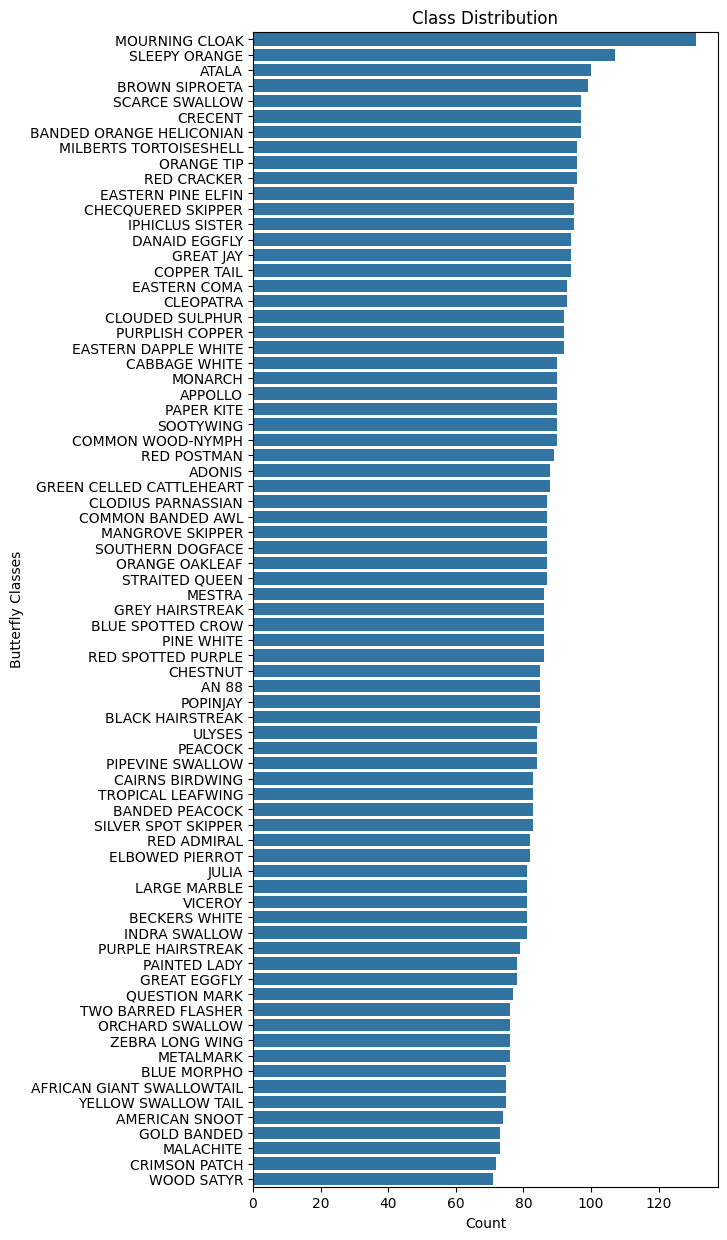

In [ ]:
#Jumlah kupu-kupu per jenis
plt.figure(figsize = (6, 15))
sns.countplot(y = "label", data = data, order = data["label"].value_counts().index)
plt.xlabel("Count")
plt.ylabel("Butterfly Classes")
plt.title("Class Distribution")
plt.show()

Train Test Split

In [ ]:
#split data
train_data, val_data = train_test_split(data, test_size = 0.2, random_state = 10)

# train_data --> data yang digunakan untuk training
# val_data --> data yang digunakan untuk menguji atau mengevaluasi
# train_test_split --> function untuk melakukan training data (membagi 2 data menjadi train_data dan val_data); training dan validasi
# test_size --> untuk membagi jumlah yang data yang ditraining dan validasi (0.3 berarti validasinya 30% dan trainingnya 70%)
# random_state --> untuk menentukan seed atau nilai awal random generator dari hasil pembagian data set



In [ ]:
train_data.head()

# train_data --> train datanya, head() untuk menampilkan sejumlah row pertama. Contoh: head(10) maka yang ditampilkan adalah 10 row pertama / teratas

,filename,label,path
2705,Image_2706.jpg,MANGROVE SKIPPER,Dataset/train/Image_2706.jpg
2120,Image_2121.jpg,MANGROVE SKIPPER,Dataset/train/Image_2121.jpg
2145,Image_2146.jpg,QUESTION MARK,Dataset/train/Image_2146.jpg
2756,Image_2757.jpg,YELLOW SWALLOW TAIL,Dataset/train/Image_2757.jpg
398,Image_399.jpg,GREAT EGGFLY,Dataset/train/Image_399.jpg


In [ ]:
val_data.head()

# val_data --> validasi datanya, head() untuk menampilkan sejumlah row pertama. Contoh: head(10) maka yang ditampilkan adalah 10 row pertama / teratas

,filename,label,path
5748,Image_5749.jpg,PURPLISH COPPER,Dataset/train/Image_5749.jpg
2529,Image_2530.jpg,BECKERS WHITE,Dataset/train/Image_2530.jpg
5030,Image_5031.jpg,APPOLLO,Dataset/train/Image_5031.jpg
5143,Image_5144.jpg,ELBOWED PIERROT,Dataset/train/Image_5144.jpg
1551,Image_1552.jpg,BANDED ORANGE HELICONIAN,Dataset/train/Image_1552.jpg


In [ ]:
# Baca file CSV untuk dataset pengujian
test_data = pd.read_csv("Dataset/Testing_set.csv")
test_data['path'] = "Dataset/test/" + test_data["filename"]
test_data.head()

,filename,path
0,Image_1.jpg,Dataset/test/Image_1.jpg
1,Image_2.jpg,Dataset/test/Image_2.jpg
2,Image_3.jpg,Dataset/test/Image_3.jpg
3,Image_4.jpg,Dataset/test/Image_4.jpg
4,Image_5.jpg,Dataset/test/Image_5.jpg


In [ ]:
#add path

data['path'] = "Dataset/train/" + data["filename"]

data.head()

,filename,label,path
0,Image_1.jpg,SOUTHERN DOGFACE,Dataset/train/Image_1.jpg
1,Image_2.jpg,ADONIS,Dataset/train/Image_2.jpg
2,Image_3.jpg,BROWN SIPROETA,Dataset/train/Image_3.jpg
3,Image_4.jpg,MONARCH,Dataset/train/Image_4.jpg
4,Image_5.jpg,GREEN CELLED CATTLEHEART,Dataset/train/Image_5.jpg


In [ ]:
train_datagen = ImageDataGenerator(rescale = 1.0 / 255)

train_set = train_datagen.flow_from_dataframe(
    dataframe = train_data,
    x_col = "path",
    y_col = "label",
    target_size = (180, 180),
    batch_size = 16,
    class_mode = "sparse"
    )

val_datagen = ImageDataGenerator(rescale = 1.0 / 255)

val_set = train_datagen.flow_from_dataframe(
    dataframe = val_data,
    x_col = "path",
    y_col = "label",
    target_size = (180, 180),
    batch_size = 16,
    class_mode = "sparse"
 )

# train_datagen dan val_datagen = menggunakan Image Data Generator mempersiapkan gambar-gambar agar model machine learning dapat belajar lebih efektif.
# rescale = 1.0 / 255 mengubah nilai piksel gambar menjadi rentang antara 0 dan 1. membantu dalam pelatihan model dan meningkatkan kinerja model.

# flow_from_dataframe = memungkinkan mengubah data pada dataframe menjadi aliran data yang sesuai untuk train dan validation machine learning.
# dataframe = sumber data
# x_col = column gambar
# y_col = column label/clasess
# target_size = ukuran target adalah 180px * 180px
# class_mode = bahwa label kelas yang digunakan adalah bilangan bulat (integer)

#louis

Found 5199 validated image filenames belonging to 75 classes.
Found 1300 validated image filenames belonging to 75 classes.


In [ ]:
print(train_set)

In [ ]:
images, labels = next(train_set)
print(labels)

class_names = train_set.class_indices
class_names = {v: k for k, v in class_names.items()}

print(class_names)

# next --> untuk retrieve first batch dari dari train_set
# image --> isi batch gambar
# labels --> label yang sesuai dengan gambar
# print(labels) --> print label dari batch-batch gambar yang diambil dari train_set
# train_set.class_indices --> melakukan mapping class name ke numeric indeks
# class_names = {v: k for k, v in class_names.items()} --> meng-access class name menggunakan numeric indeks
# print(class_names) --> print hasil class_names

#brandon

[49. 38. 42. 15. 62. 21. 20. 50. 36. 47. 65. 49. 71. 39. 58. 39.]
{0: 'ADONIS', 1: 'AFRICAN GIANT SWALLOWTAIL', 2: 'AMERICAN SNOOT', 3: 'AN 88', 4: 'APPOLLO', 5: 'ATALA', 6: 'BANDED ORANGE HELICONIAN', 7: 'BANDED PEACOCK', 8: 'BECKERS WHITE', 9: 'BLACK HAIRSTREAK', 10: 'BLUE MORPHO', 11: 'BLUE SPOTTED CROW', 12: 'BROWN SIPROETA', 13: 'CABBAGE WHITE', 14: 'CAIRNS BIRDWING', 15: 'CHECQUERED SKIPPER', 16: 'CHESTNUT', 17: 'CLEOPATRA', 18: 'CLODIUS PARNASSIAN', 19: 'CLOUDED SULPHUR', 20: 'COMMON BANDED AWL', 21: 'COMMON WOOD-NYMPH', 22: 'COPPER TAIL', 23: 'CRECENT', 24: 'CRIMSON PATCH', 25: 'DANAID EGGFLY', 26: 'EASTERN COMA', 27: 'EASTERN DAPPLE WHITE', 28: 'EASTERN PINE ELFIN', 29: 'ELBOWED PIERROT', 30: 'GOLD BANDED', 31: 'GREAT EGGFLY', 32: 'GREAT JAY', 33: 'GREEN CELLED CATTLEHEART', 34: 'GREY HAIRSTREAK', 35: 'INDRA SWALLOW', 36: 'IPHICLUS SISTER', 37: 'JULIA', 38: 'LARGE MARBLE', 39: 'MALACHITE', 40: 'MANGROVE SKIPPER', 41: 'MESTRA', 42: 'METALMARK', 43: 'MILBERTS TORTOISESHELL', 44:

In [ ]:
print(images.shape)
#16 = batch_size, setiap 16 gambar diambil
#180 = perkalian pixel, lebar
#180 = perkalian pixel, tinggi
#3 = jumlah channel RGB

(16, 180, 180, 3)


In [ ]:
print(images[0].shape)
print(images[0]) #nilai intensitas warna dari gambar pertama
#tiap channel mempunyai

(180, 180, 3)
[[[0.37254903 0.54509807 0.2509804 ]
  [0.36862746 0.5411765  0.24705884]
  [0.36862746 0.5372549  0.25490198]
  ...
  [0.4156863  0.57254905 0.29411766]
  [0.37254903 0.5137255  0.27450982]
  [0.3921569  0.5294118  0.3019608 ]]

 [[0.36862746 0.5411765  0.24705884]
  [0.36862746 0.5411765  0.24705884]
  [0.36862746 0.5372549  0.25490198]
  ...
  [0.40784317 0.5647059  0.28627452]
  [0.38431376 0.5254902  0.28235295]
  [0.39607847 0.5372549  0.29803923]]

 [[0.3647059  0.5372549  0.24313727]
  [0.3647059  0.5372549  0.24313727]
  [0.37254903 0.5411765  0.25882354]
  ...
  [0.40784317 0.5529412  0.28235295]
  [0.427451   0.5686275  0.31764707]
  [0.4156863  0.5568628  0.30588236]]

 ...

 [[0.34509805 0.5372549  0.1254902 ]
  [0.34509805 0.5372549  0.1254902 ]
  [0.34509805 0.5372549  0.11764707]
  ...
  [0.3921569  0.5254902  0.18431373]
  [0.3921569  0.5254902  0.18431373]
  [0.3921569  0.5254902  0.18431373]]

 [[0.34117648 0.53333336 0.12156864]
  [0.34117648 0.5333333

In [ ]:
print(images[0][0]) #nilai intensitas warna dari baris pertama gambar pertama

[[0.37254903 0.54509807 0.2509804 ]
 [0.36862746 0.5411765  0.24705884]
 [0.36862746 0.5372549  0.25490198]
 [0.36078432 0.5254902  0.23529413]
 [0.37647063 0.53333336 0.25490198]
 [0.3921569  0.5254902  0.28627452]
 [0.7019608  0.77647066 0.6509804 ]
 [0.8235295  0.8745099  0.7960785 ]
 [0.8980393  0.9294118  0.87843144]
 [0.9725491  0.9921569  0.96470594]
 [0.9333334  0.9333334  0.9333334 ]
 [0.70980394 0.7058824  0.7372549 ]
 [0.29803923 0.29411766 0.3254902 ]
 [0.3137255  0.3137255  0.34509805]
 [0.8745099  0.86666673 0.909804  ]
 [0.8078432  0.79215693 0.85098046]
 [0.52156866 0.49411768 0.5647059 ]
 [0.28627452 0.2392157  0.3254902 ]
 [0.2784314  0.22352943 0.2901961 ]
 [0.24313727 0.18039216 0.23137257]
 [0.38431376 0.3372549  0.3529412 ]
 [0.53333336 0.5058824  0.47450984]
 [0.5764706  0.5803922  0.50980395]
 [0.45098042 0.52156866 0.37254903]
 [0.40000004 0.4901961  0.31764707]
 [0.38823533 0.5058824  0.3019608 ]
 [0.41176474 0.5411765  0.31764707]
 [0.36078432 0.5058824  0.23

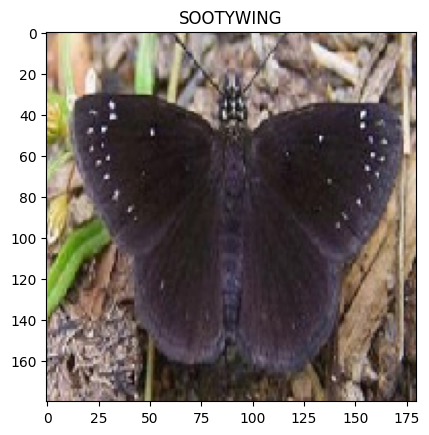

In [ ]:
i = 10
plt.figure()
plt.imshow(images[i], cmap = plt.cm.binary)
plt.title(class_names[labels[i]])
plt.show()

# define i = 10
# plt.figure() = untuk membuat gambar baru yang akan ditampilkan. (seperti newfile di docs)
# plt.imshow(images[i], cmap = plt.cm.binary) = untuk mengenerate gambar ke i (i=10) dengan images[i] dan cmap = plt.cm.binary untuk memberikan warna
# plt.title(class_names[labels[i]]) = membuat title class berdasarkan labels data ke i [i=10] dari kolom class_name
# plt.show() = memberikan output gambar

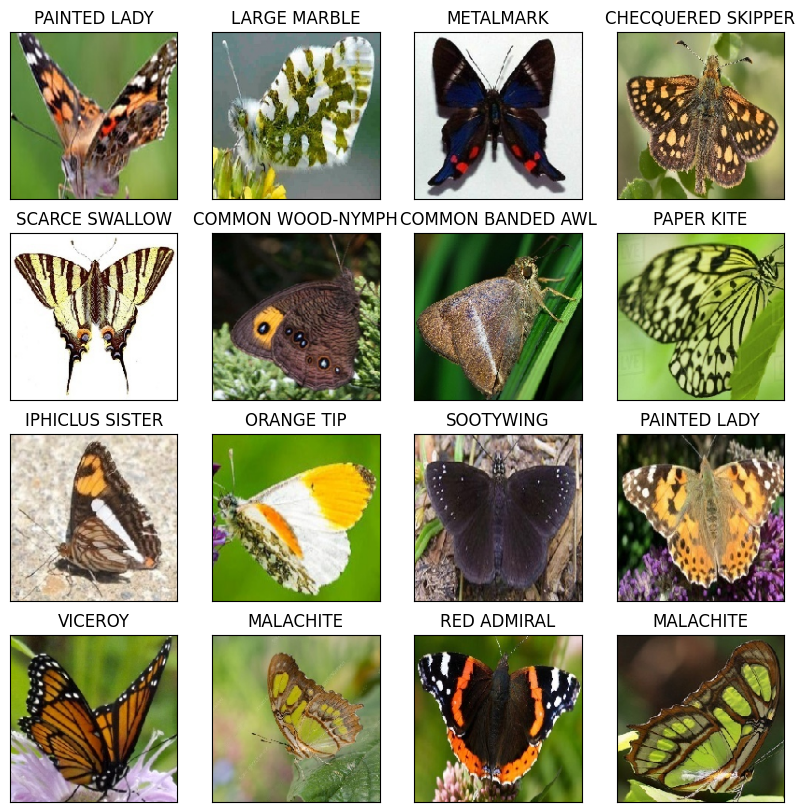

In [ ]:
i = 10
plt.figure(figsize = (10, 10))
for i in range(16):
  plt.subplot(4, 4, i + 1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(images[i], cmap = plt.cm.binary)
  plt.title(class_names[labels[i]])
plt.show()

# i = 10 --> assign nilai dari variable i adalah 10
# plt.figure(figsize = (10, 10)) --> create figure baru dengan ukuran 10 10
# for i in range(16): --> looping sebanyak 16 kali
# plt.subplot(4, 4, i + 1) --> lanjutan dari looping diatas; looping untuk ukuran gambar 4x4. subplot indeks dimulai dari 1 bukan 0
# plt.xticks([]) & plt.yticks ([]) --> untuk menghapus tick marks di x dan y axes.
# plt.grid(false) --> function untuk menghilangkan grid pada image
# plt.imshow(images[i], cmap = plt.cm.binary) --> menampilkan gambar dari indeks i dari images array. Menggunakan binary colormap (plt.cm.binary)
# plt.title(class_names[labels[i]]) --> memberi title subplot pada label untuk gambar pada indeks i. Didapat dari class_names menggunakan label array.


#brandon

Design Deep Learning Architecture

In [ ]:
feature learning
model = Sequential() #layer linear
model.add(Input(shape = (180, 180, 3))) #menambahkan layer input
#180 baris x 180 kolom x 3 rgb
#mulai CNN -> feature map
model.add(layers.Conv2D(64, (3, 3), activation = "relu"))
#dr 1 matrix jadi 64 matrix
#relu kalo nilainya dibawah nol -> nilainya jadi 0
#kalo diatas 0 berarti jadi dirinya sendiri
#menambahkan layer convolution
#ada 64 filter/channel, isinya matrix 3 x 3

model.add(layers.MaxPooling2D(2,2))
#64 berubah lagi menjadi 32 matrix/filter dengan matriks 3x3
model.add(layers.Conv2D(32, (3,3), activation = "relu"))
model.add(layers.MaxPooling2D(2, 2)) #ngurangin dimensi spasial output dari layer sebelumnya
#akhir CNN
#CNN tugasnya membuat matrix

#menghitung loss, start epoch
model.add(layers.Flatten()) #ngubah tensor dari 2D -> 1D
model.add(layers.Dense(512, activation = "relu"))
model.add(layers.Dense(256, activation = "relu")) #menambahkan layer dense
model.add(layers.Dense(bt_class_num, activation = "softmax")) #hidden layer

model.compile(
    loss = 'sparse_categorical_crossentropy', #label dijadikan int, bukan float
    optimizer = tf.keras.optimizers.RMSprop(learning_rate = 0.0005),
    #learning rate = proses perbaikan
    #optimalkan model
    metrics = ["accuracy"]
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 178, 178, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 89, 89, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 43, 43, 32)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 59168)             0         
                                                                 
 dense (Dense)               (None, 512)               3

tipe modelnya berupa sequential

In [ ]:
model_1 = model.fit(
    train_set,
    epochs = 10,
    validation_data = val_set
)

#jumlah data 4945/ batch size 16 = 285
#setiap batch 16 gambar
#dibutuhkan 285 step untuk mencapai 1 epoch

Epoch 1/10
325/325 [==============================] - 3405s 10s/step - loss: 3.4781 - accuracy: 0.1643 - val_loss: 2.9333 - val_accuracy: 0.2377
Epoch 2/10
325/325 [==============================] - 28s 87ms/step - loss: 1.9027 - accuracy: 0.4901 - val_loss: 2.2243 - val_accuracy: 0.4162
Epoch 3/10
325/325 [==============================] - 34s 104ms/step - loss: 0.7829 - accuracy: 0.7823 - val_loss: 2.2194 - val_accuracy: 0.4485
Epoch 4/10
325/325 [==============================] - 31s 94ms/step - loss: 0.2409 - accuracy: 0.9358 - val_loss: 3.4557 - val_accuracy: 0.3769
Epoch 5/10
325/325 [==============================] - 29s 89ms/step - loss: 0.1099 - accuracy: 0.9692 - val_loss: 2.9212 - val_accuracy: 0.4438
Epoch 6/10
325/325 [==============================] - 31s 96ms/step - loss: 0.0542 - accuracy: 0.9871 - val_loss: 3.6831 - val_accuracy: 0.4608
Epoch 7/10
325/325 [==============================] - 30s 91ms/step - loss: 0.0318 - accuracy: 0.9929 - val_loss: 3.8925 - val_accurac

Keluaran kode menunjukkan kemajuan pelatihan model selama 10 periode. Berikut beberapa metrik utama yang ditampilkan:

LOSS: Kerugian adalah ukuran seberapa cocok prediksi model dengan label data sebenarnya. Nilai kerugian yang lebih rendah menunjukkan kinerja yang lebih baik.

akurasi: Akurasi adalah persentase prediksi yang benar dari model.

val_loss: Kerugian validasi adalah kerugian yang dihitung pada set validasi.

val_accuracy: Akurasi validasi adalah akurasi yang dihitung pada set validasi.



In [ ]:
def visualize(history):
  acc = history.history["accuracy"]
  val_acc = history.history["val_accuracy"]
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]
  epochs = range(1, len(acc) + 1)

  fig, axs = plt.subplots(1, 2, figsize = (12, 5))
  axs[0].plot(epochs, acc, 'r', label = "Training Acc")
  axs[0].plot(epochs, val_acc, 'b', label = "Validation Acc")
  axs[0].set_title("Training and Validation Accuracy")
  axs[0].legend()
  axs[0].grid(True)

  axs[1].plot(epochs, loss, 'r', label = "Training Loss")
  axs[1].plot(epochs, val_loss, 'b', label = "Validation Loss")
  axs[1].set_title("Training and Validation Loss")
  axs[1].legend()
  axs[1].grid(True)

  plt.tight_layout()
  plt.show()

  # function visualize(history) =  untuk memvisualisasikan matrix train dan validation dari model mcahine learning
  # acc = accuracy model
  # val_acc = accuracy validation model
  # loss = error/bias model
  # Val_loss = error/bias validation model
  # epoch = jumlah train yang dilakukan model
  # fig, axs = plt.subplots(1, 2, figsize = (12, 5)) = digunakan untuk membuat figure (gambar) dengan dua subplot horizontal, dengan ukuran gambar sebesar 12x5

  # axs[0].plot(epochs, acc, 'r', label = "Training Acc") = buat plot Training Acc
  # axs[0].plot(epochs, val_acc, 'b', label = "Validation Acc") = buat plot Validation Acc
  # axs[0].set_title("Training and Validation Accuracy") = buat title tulisan yang menunjukan bahwa plot ini membandingkan accuracy validationdan training
  # axs[0].legend() = legenda akan menjelaskan bahwa garis merah mewakili data train sementara garis biru mewakili data validation.
  # axs[0].grid(True) = untuk menambahkan garis batu agar mempermudah membaca plot

  # axs[1].plot(epochs, loss, 'r', label = "Training Loss") = buat plot Training Loss
  # axs[1].plot(epochs, val_loss, 'b', label = "Validation Loss") = buat plot Validation Loss
  # axs[1].set_title("Training and Validation Loss") = buat title tulisan yang menunjukan bahwa plot ini membandingkan Loss validationdan training
  # axs[1].legend() = legenda akan menjelaskan bahwa garis merah mewakili data train sementara garis biru mewakili data validation.
  # axs[1].grid(True) = untuk menambahkan garis batu agar mempermudah membaca plot

  # plt.tight_layout() = memastikan gambarnya rapi
  # plt.show() = output plot


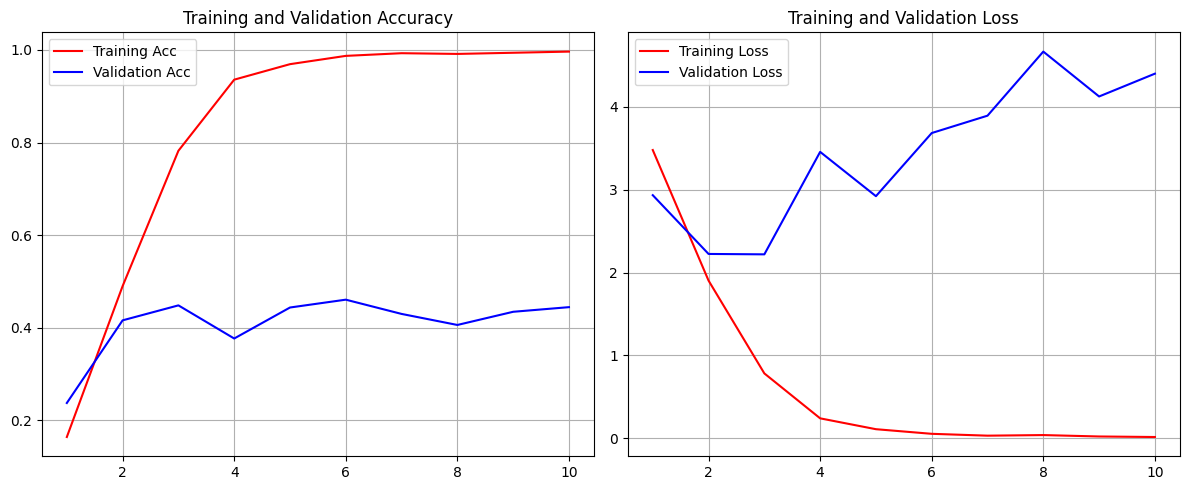

In [ ]:
visualize(model_1)


##jika plotnya sudah benar
Seperti yang dapat Anda lihat dari outputnya, kerugian pelatihan dan kerugian validasi model menurun seiring waktu, yang menunjukkan bahwa model tersebut sedang belajar. Akurasi pelatihan dan akurasi validasi model juga meningkat seiring waktu, yang menunjukkan bahwa model berperforma lebih baik pada data pelatihan dan data validasi.

Secara keseluruhan, keluarannya menunjukkan bahwa model tersebut dilatih dengan baik dan menggeneralisasi data yang tidak terlihat dengan baik.

In [ ]:
model.save("mytrain_model.h5")

1. e. bisa coba augmented atau tuning hyperparameter, batch normalization

belom tentu model x yg dipake untuk data pretrained kupu-kupu cocok